Confusion Matrix:
 [[  0   0   1   1   0   0]
 [  0   0  10   3   1   0]
 [  0   0 106  59   4   0]
 [  0   0  72  87  11   0]
 [  0   0  13  16  11   0]
 [  0   0   4   1   0   0]]


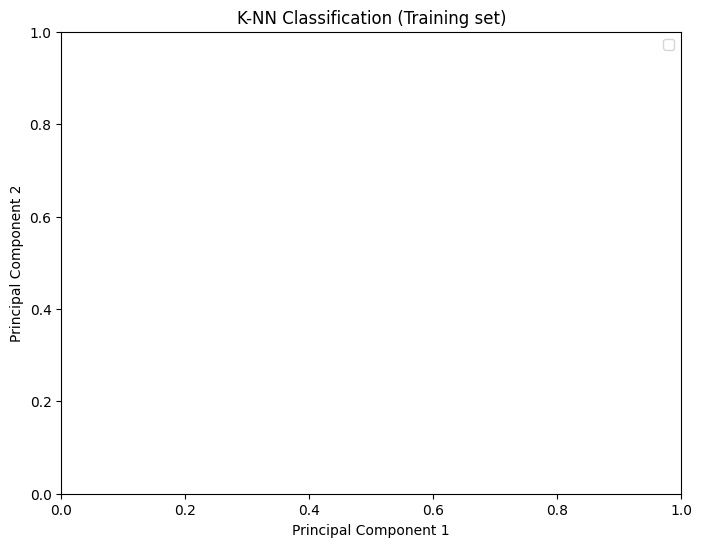

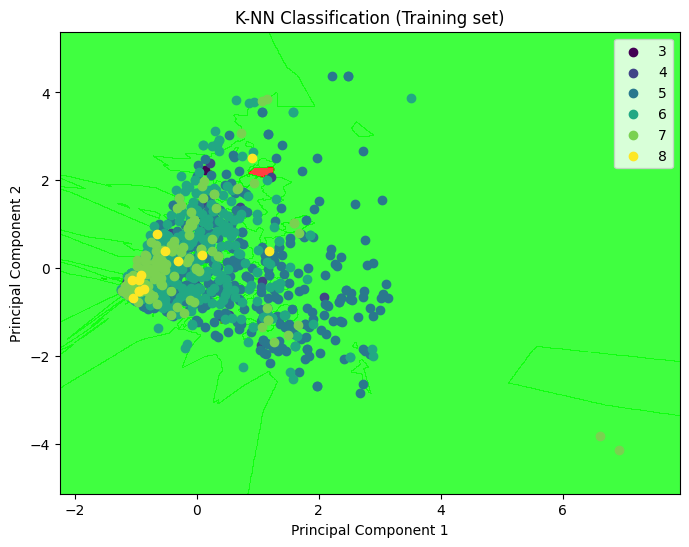

Accuracy of the model is 51.0 %


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

# Load the wine quality dataset (make sure the CSV is in the correct path)
dataset = pd.read_csv("/content/winequality-red.csv")

# Preprocess the dataset
dataset.dropna(inplace=True)  # Drop rows with missing values if any

# Selecting features and target
X = dataset.drop('quality', axis=1).values  # All columns except 'quality'
y = dataset['quality'].values  # Target is the 'quality' column

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize and fit the K-NN classifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualizing the Training set results (after PCA)
plt.figure(figsize=(8, 6))  # Optional: Specify figure size for better visibility
plt.title('K-NN Classification (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualizing the Test set results (after PCA)
plt.figure(figsize=(8, 6))

# Create meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))

# Plot decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['#FF0000', '#00FF00']))

# Plot training data points
cmap = plt.cm.get_cmap('viridis', len(np.unique(y_train)))  # Use a colormap for training set points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                color=cmap(i), label=j)

plt.title('K-NN Classification (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()  # Make sure this is called to display the test set visualization

# Model Accuracy
accuracy = classifier.score(X_test, y_test)
print('Accuracy of the model is', accuracy * 100, '%')
